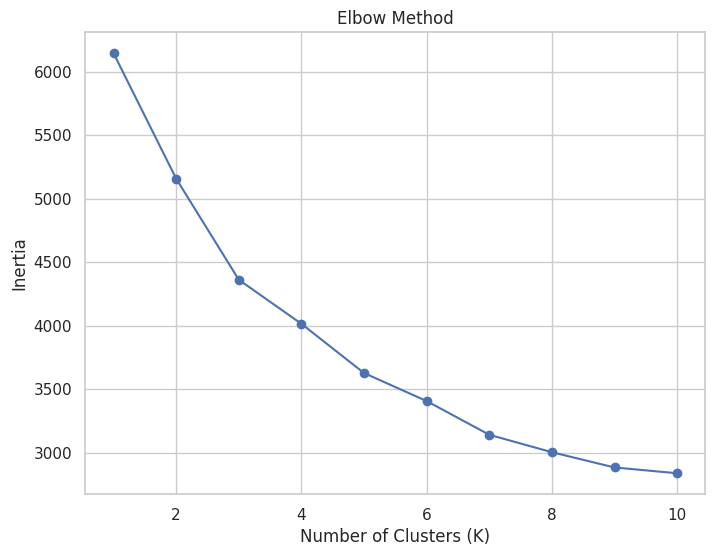

Silhouette Score: 0.18069417622943776
Cluster Centers:
 [[-0.26489422  0.64628823  0.26298746  0.89342852  1.02126799  0.63208219
   0.41176195 -0.12515833]
 [ 1.01888184  0.23526795  0.40087778 -0.48012719 -0.45255901  0.02379893
  -0.10364969  1.06754881]
 [-0.50524078 -0.56782518 -0.43296503 -0.25207235 -0.35183994 -0.41884153
  -0.19400813 -0.62655557]]


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for plotting in Colab
%matplotlib inline
sns.set(style="whitegrid")

# Upload the diabetes dataset file if not already in Colab
from google.colab import files
import os

if not os.path.isfile('diabetes.csv'):
    print("Please upload the diabetes.csv file.")
    uploaded = files.upload()

# Load the dataset
try:
    df = pd.read_csv("diabetes.csv")
except FileNotFoundError:
    print("The file 'diabetes.csv' could not be found. Please ensure it's uploaded.")

# Preprocess the data
try:
    features = df.drop(columns=['Outcome'])  # Drop any label if present
except KeyError:
    print("Outcome column not found in the dataset. Please check the dataset structure.")

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Fit the K-means model with the optimal K
optimal_k = 3  # Assume 3 is optimal from elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

# Evaluate the clustering using silhouette score
score = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {score}')

# Analyze cluster characteristics
cluster_centers = kmeans.cluster_centers_
print(f'Cluster Centers:\n {cluster_centers}')